In [4]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [10]:
df.columns = ['label', 'text']

In [11]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
X =  df.drop('label', axis=1)
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
vectorizer = CountVectorizer()
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

In [16]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [17]:
y_pred = classifier.predict(X_test_vectorized)

In [18]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy:", ac)
print("\nConfusion Matrix:\n", cm)
print("\nClassification report:", cr)

Accuracy: 0.9835981547924142

Confusion Matrix:
 [[1680    5]
 [  27  239]]

Classification report:               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1685
        spam       0.98      0.90      0.94       266

    accuracy                           0.98      1951
   macro avg       0.98      0.95      0.96      1951
weighted avg       0.98      0.98      0.98      1951



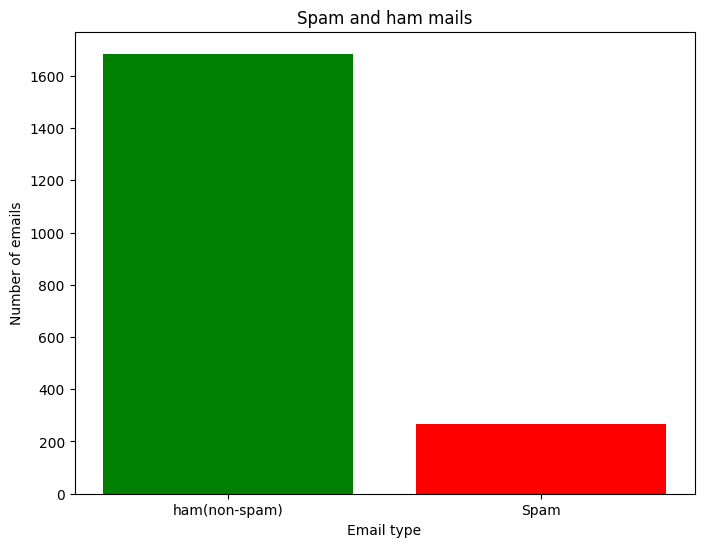

In [22]:
import matplotlib.pyplot as plt
spam_counts= y_test.value_counts()
plt.figure(figsize=(8,6))
plt.bar(spam_counts.index,spam_counts.values,color=['green','red'])
plt.xlabel('Email type')
plt.ylabel('Number of emails')
plt.title('Spam and ham mails')
plt.xticks([0,1],['ham(non-spam)','Spam'])
plt.show()